In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [2]:
DF_X_PATH = "df_x1.csv"

In [3]:
DF_Y_PATH = "df_y1.csv"

In [4]:
df_x = pd.read_csv(DF_X_PATH)
df_y = pd.read_csv(DF_Y_PATH)

In [5]:
df_x.head()

,ActualFlightTime,ActualTotalFuel,FLownPassengers,BagsCount,FlightBagsWeight
0,91,3660,175,61,440
1,68,3280,182,27,350
2,64,2720,127,38,490
3,35,1682,163,12,150
4,34,1877,178,37,490


In [6]:
df_y.head()

,ActualTOW
0,64016
1,66138
2,58447
3,60587
4,63090


In [7]:
df1 = pd.DataFrame(df_x)

In [8]:
display(df1)

,ActualFlightTime,ActualTotalFuel,FLownPassengers,BagsCount,FlightBagsWeight
0,91,3660,175,61,440
1,68,3280,182,27,350
2,64,2720,127,38,490
3,35,1682,163,12,150
4,34,1877,178,37,490
...,...,...,...,...,...
29293,102,4880,177,96,1250
29294,163,6890,185,107,1390
29295,145,6322,172,64,830
29296,132,5880,183,82,1090


In [9]:
df2 = pd.DataFrame(df_y)

In [10]:
display(df2)

,ActualTOW
0,64016
1,66138
2,58447
3,60587
4,63090
...,...
29293,66247
29294,67898
29295,66247
29296,68224


In [11]:
np_array = df1.to_numpy()

In [12]:
display(np_array)

array([[  91, 3660,  175,   61,  440],
       [  68, 3280,  182,   27,  350],
       [  64, 2720,  127,   38,  490],
       ...,
       [ 145, 6322,  172,   64,  830],
       [ 132, 5880,  183,   82, 1090],
       [  79, 3400,  153,   37,  480]], dtype=int64)

In [13]:
import copy

In [14]:
arr1 = copy.deepcopy(np_array)

In [15]:
display(arr1)

array([[  91, 3660,  175,   61,  440],
       [  68, 3280,  182,   27,  350],
       [  64, 2720,  127,   38,  490],
       ...,
       [ 145, 6322,  172,   64,  830],
       [ 132, 5880,  183,   82, 1090],
       [  79, 3400,  153,   37,  480]], dtype=int64)

In [16]:
del np_array

In [17]:
arr2 = df2.to_numpy()

In [18]:
arr2

array([[64016],
       [66138],
       [58447],
       ...,
       [66247],
       [68224],
       [63635]], dtype=int64)

In [19]:
testSize = 100
X_train = arr1
y_train = arr2
X_train = arr1[:testSize, :].T
y_train = arr2[:testSize, :].T
X_test = arr1[testSize:2*testSize, :].T
y_test = arr2[testSize:2*testSize, :].T.reshape((testSize,))

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
x = np.linspace(1, testSize, num=testSize)
print(x.shape)


(5, 100)
(1, 100)
(5, 100)
(100,)
(100,)


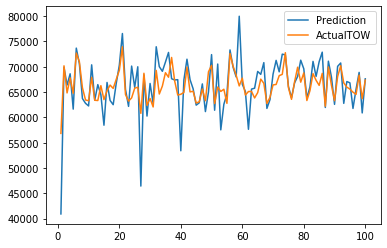

,0
0,56832
1,70183
2,64832
3,67807
4,64759
...,...
95,64977
96,64542
97,68351
98,63689


In [20]:
#X_train, X_test, y_train, y_test

# Application of linear regression algorithm for my dataset
a_opt = inv(X_train @ X_train.T) @ X_train @ y_train.T

# Calculating prediction 
y_pred = X_test[0, :] * a_opt[0] + X_test[1, :] * a_opt[1] + X_test[2, :] * a_opt[2] + X_test[3, :] * a_opt[3] + X_test[4, :] * a_opt[4] 

# Calculating mse 
err = np.sum(np.square(y_test-y_pred))

# Plotting
plt.plot(x, y_pred, label = 'Prediction')
plt.plot(x, y_test, label = 'ActualTOW')

plt.legend()
plt.show()

pd.DataFrame(y_test)



In [21]:
pd.DataFrame(y_pred)

,0
0,40920.378663
1,69881.147012
2,66390.418027
3,68608.933283
4,61629.154660
...,...
95,61760.751858
96,65576.136225
97,68883.780470
98,60875.216650


In [22]:
np.abs(y_pred - y_test).mean()/y_test.mean()

0.03765990386648991